In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import *
from statsmodels.tsa import stattools
import matplotlib.pyplot as plt
from arch import arch_model
from arch.unitroot import ADF

In [2]:
Google = pd.read_csv('GOOGLE.csv', parse_dates=True, index_col='datadate')

In [3]:
GoogleRet = Google['trt1m']
GoogleRet = GoogleRet.dropna()
GoogleRet.head()

datadate
2004-09-30    26.5996
2004-10-31    47.0988
2004-11-30    -4.5426
2004-12-31     5.9402
2005-01-31     1.4679
Name: trt1m, dtype: float64

Text(0.5, 1.0, 'Google')

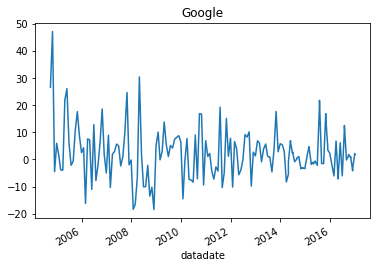

In [4]:
GoogleRet.plot()
plt.title("Google")

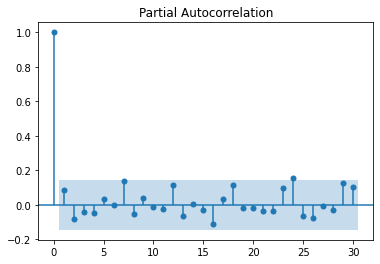

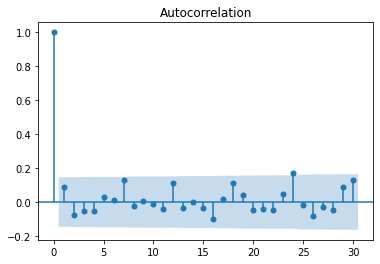

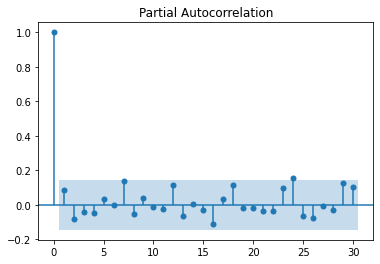

In [5]:
plot_acf(GoogleRet,lags=30)
plot_pacf(GoogleRet,lags=30)

In [6]:
adf_GoogleRet=ADF(GoogleRet)
print(adf_GoogleRet.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -12.479
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [7]:
LjungBox=stattools.q_stat(stattools.acf(GoogleRet)[1:13],len(GoogleRet))
LjungBox[1][-1]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


0.6514357138166709

Text(0.5, 1.0, 'Google 2')

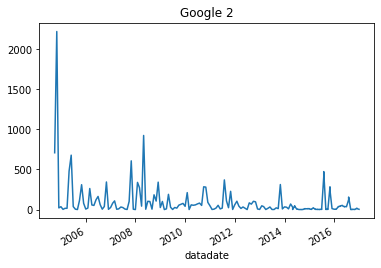

In [8]:
GoogleRet2 = GoogleRet**2
GoogleRet2.plot()
plt.title("Google 2")

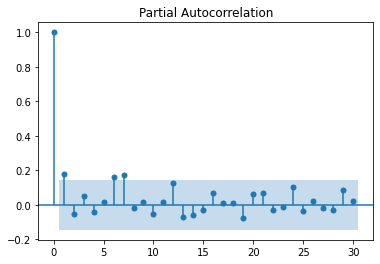

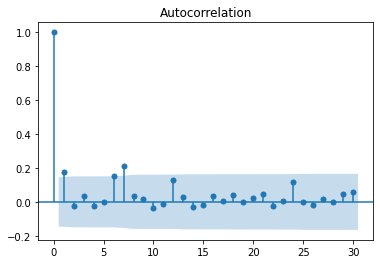

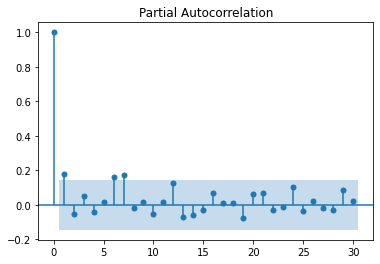

In [9]:
plot_acf(GoogleRet**2,lags=30)
plot_pacf(GoogleRet**2,lags=30)

Text(0.5, 1.0, 'Squared Daily Return of Google')

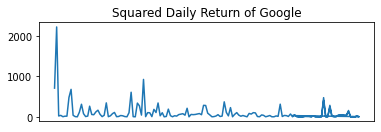

In [10]:
plt.subplot(211)
plt.plot(GoogleRet**2)
plt.xticks([])
plt.title('Squared Daily Return of Google')

Text(0.5, 1.0, 'Absolute Daily Return of Google')

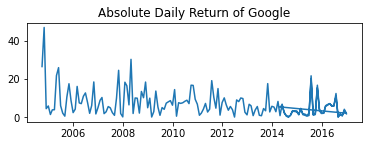

In [11]:
plt.subplot(212)
plt.plot(np.abs(GoogleRet))
plt.title('Absolute Daily Return of Google')

In [12]:
LjungBox=stattools.q_stat(stattools.acf(GoogleRet**2)[1:13],len(GoogleRet))
LjungBox[1][-1]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


0.027625524247296553

In [13]:
am = arch_model(GoogleRet)
model = am.fit(update_freq=0)
print(model.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 636.2369000255945
            Iterations: 16
            Function evaluations: 88
            Gradient evaluations: 16
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  trt1m   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -636.237
Distribution:                  Normal   AIC:                           1280.47
Method:            Maximum Likelihood   BIC:                           1293.27
                                        No. Observations:                  181
Date:                Fri, May 14 2021   Df Residuals:                      180
Time:                        11:26:56   Df Model:                            1
                               Mean Model                               
       